<div style="background-color:#00008B; padding: 20px; border-radius: 255px; font-weight: bold; border: 3px solid #00008B; text-align: center;">
    <h1 style="font-size: 30px; color: white; margin: 0;">Smart Decision Maker by Monitoring Progress of Student's Study</h1>
</div>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student-performance-bd/bd_students_per.csv


<div style="background-color:#00008B; padding: 20px; border-radius: 255px; font-weight: bold; border: 3px solid #00008B; text-align: center;">
    <h1 style="font-size: 30px; color: white; margin: 0;"> 1 | Import Libraries</h1>
</div>


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    mean_absolute_error,
    mean_squared_error
)

<div style="background-color:#00008B; padding: 20px; border-radius: 255px; font-weight: bold; border: 3px solid #00008B; text-align: center;">
    <h1 style="font-size: 30px; color: white; margin: 0;">2 | Download Dataset</h1>
</div>




In [3]:
data = pd.read_csv('/kaggle/input/student-performance-bd/bd_students_per.csv')
data.head()

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,2,Avi Biswas,16,Male,Urban,6,SSC,HSC,No,No,...,Yes,Private,95,Yes,95,98,92,94,98,Science
1,3,Taslima Sultana,18,Female,Rural,6,SSC,HSC,No,Yes,...,No,Semi_Govt,92,No,65,71,40,78,80,Commerce
2,4,Md Adilur Rahman,15,Male,Rural,4,SSC,SSC,Yes,Yes,...,Yes,Govt,81,Yes,64,78,58,86,74,Commerce
3,5,Saleh Ahmed,16,Male,Rural,6,SSC,SSC,Yes,Yes,...,Yes,Private,90,Yes,84,90,85,86,88,Science
4,6,Din Islam,17,Male,Urban,5,Honors,Masters,No,Yes,...,Yes,Semi_Govt,75,Yes,54,70,45,79,76,Commerce


<div style="background-color:#00008B; padding: 20px; border-radius: 255px; font-weight: bold; border: 3px solid #00008B; text-align: center;">
    <h1 style="font-size: 30px; color: white; margin: 0;">3 | Inspecting and Cleaning Dataframe Structure</h1>
</div>


In [4]:
class_count = data["stu_group"].value_counts()

class_count

stu_group
Science     2975
Commerce    2886
Arts        2751
Name: count, dtype: int64

>  Check Dataframe information


In [5]:
print('### Dataframe information ###','\n')
data.info()

### Dataframe information ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8612 entries, 0 to 8611
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           8612 non-null   int64 
 1   full_name                    8612 non-null   object
 2   age                          8612 non-null   int64 
 3   gender                       8612 non-null   object
 4   location                     8611 non-null   object
 5   family_size                  8612 non-null   int64 
 6   mother_education             8602 non-null   object
 7   father_education             8608 non-null   object
 8   mother_job                   8612 non-null   object
 9   father_job                   8612 non-null   object
 10  guardian                     8612 non-null   object
 11  parental_involvement         8612 non-null   object
 12  internet_access              8612 non-null   object
 13  s

> Check Rows and Column

In [6]:
data.shape

(8612, 24)

> Checking Null value

In [7]:
data.isnull().sum()

id                              0
full_name                       0
age                             0
gender                          0
location                        1
family_size                     0
mother_education               10
father_education                4
mother_job                      0
father_job                      0
guardian                        0
parental_involvement            0
internet_access                 0
studytime                       0
tutoring                        0
school_type                     0
attendance                      0
extra_curricular_activities     0
english                         0
math                            0
science                         0
social_science                  0
art_culture                     0
stu_group                       0
dtype: int64

In [8]:
data.isnull().sum().sum()

15

> Check duplicate data

In [9]:
print("Number of duplicates: " + str(data.duplicated().sum()))

Number of duplicates: 0


> Convert the 'column_name' to lowercase

> Strip leading and trailing spaces

> Replace multiple spaces with a single space

In [10]:
# Convert the 'column_name' to lowercase
data['gender'] = data['gender'].str.lower()
data['location'] = data['location'].str.lower()
data['mother_education'] = data['mother_education'].str.lower()
data['father_education'] = data['father_education'].str.lower()
data['mother_job'] = data['mother_job'].str.lower()
data['father_job'] = data['father_job'].str.lower()

data['guardian'] = data['guardian'].str.lower()
data['parental_involvement'] = data['parental_involvement'].str.lower()
data['internet_access'] = data['internet_access'].str.lower()
data['tutoring'] = data['tutoring'].str.lower()
data['school_type'] = data['school_type'].str.lower()
data['extra_curricular_activities'] = data['extra_curricular_activities'].str.lower()
data['stu_group'] = data['stu_group'].str.lower()

# Strip leading and trailing spaces
data['stu_group'] = data['stu_group'].str.strip()

# Replace multiple spaces with a single space
data['stu_group'] = data['stu_group'].str.replace(r'\s+', ' ', regex=True)

# Check the result
data.head()

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,2,Avi Biswas,16,male,urban,6,ssc,hsc,no,no,...,yes,private,95,yes,95,98,92,94,98,science
1,3,Taslima Sultana,18,female,rural,6,ssc,hsc,no,yes,...,no,semi_govt,92,no,65,71,40,78,80,commerce
2,4,Md Adilur Rahman,15,male,rural,4,ssc,ssc,yes,yes,...,yes,govt,81,yes,64,78,58,86,74,commerce
3,5,Saleh Ahmed,16,male,rural,6,ssc,ssc,yes,yes,...,yes,private,90,yes,84,90,85,86,88,science
4,6,Din Islam,17,male,urban,5,honors,masters,no,yes,...,yes,semi_govt,75,yes,54,70,45,79,76,commerce


> Total & Average Score help to generate recommendation system

In [11]:
data.loc[: , "total_score"] = data["english"] + data["math"] + data["science"] + data["social_science"] + data["art_culture"]
data.loc[: , "average_score"] = data["total_score"] / 5
data.head()

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group,total_score,average_score
0,2,Avi Biswas,16,male,urban,6,ssc,hsc,no,no,...,95,yes,95,98,92,94,98,science,477,95.4
1,3,Taslima Sultana,18,female,rural,6,ssc,hsc,no,yes,...,92,no,65,71,40,78,80,commerce,334,66.8
2,4,Md Adilur Rahman,15,male,rural,4,ssc,ssc,yes,yes,...,81,yes,64,78,58,86,74,commerce,360,72.0
3,5,Saleh Ahmed,16,male,rural,6,ssc,ssc,yes,yes,...,90,yes,84,90,85,86,88,science,433,86.6
4,6,Din Islam,17,male,urban,5,honors,masters,no,yes,...,75,yes,54,70,45,79,76,commerce,324,64.8


> Check Numeric features

In [12]:
data.iloc[:, :].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
id,8612.000000,4307.500000,2486.214593,2.000000,2154.750000,4307.500000,6460.250000,8613.000000
total_score,8612.000000,370.774152,67.716088,220.000000,304.000000,377.000000,437.000000,489.000000
math,8612.000000,72.938110,15.816147,33.000000,64.000000,73.000000,84.000000,100.000000
english,8612.000000,73.610427,15.343903,18.000000,64.000000,75.000000,85.000000,100.000000
science,8612.000000,73.524036,15.115104,33.000000,63.000000,75.000000,85.000000,100.000000
social_science,8612.000000,74.465513,14.945846,36.000000,65.000000,77.000000,86.000000,100.000000
art_culture,8612.000000,76.236066,13.619125,36.000000,69.000000,76.000000,86.000000,100.000000
average_score,8612.000000,74.154830,13.543218,44.000000,60.800000,75.400000,87.400000,97.800000
attendance,8612.000000,74.027055,13.290046,30.000000,63.000000,73.000000,86.000000,100.000000
studytime,8612.000000,4.746168,2.185645,1.000000,3.000000,5.000000,6.000000,16.000000


<div style="background-color:#00008B; padding: 20px; border-radius: 255px; font-weight: bold; border: 3px solid #00008B; text-align: center;">
    <h1 style="font-size: 30px; color: white; margin: 0;">4 | EDA</h1>
</div>


> correletion check between the features

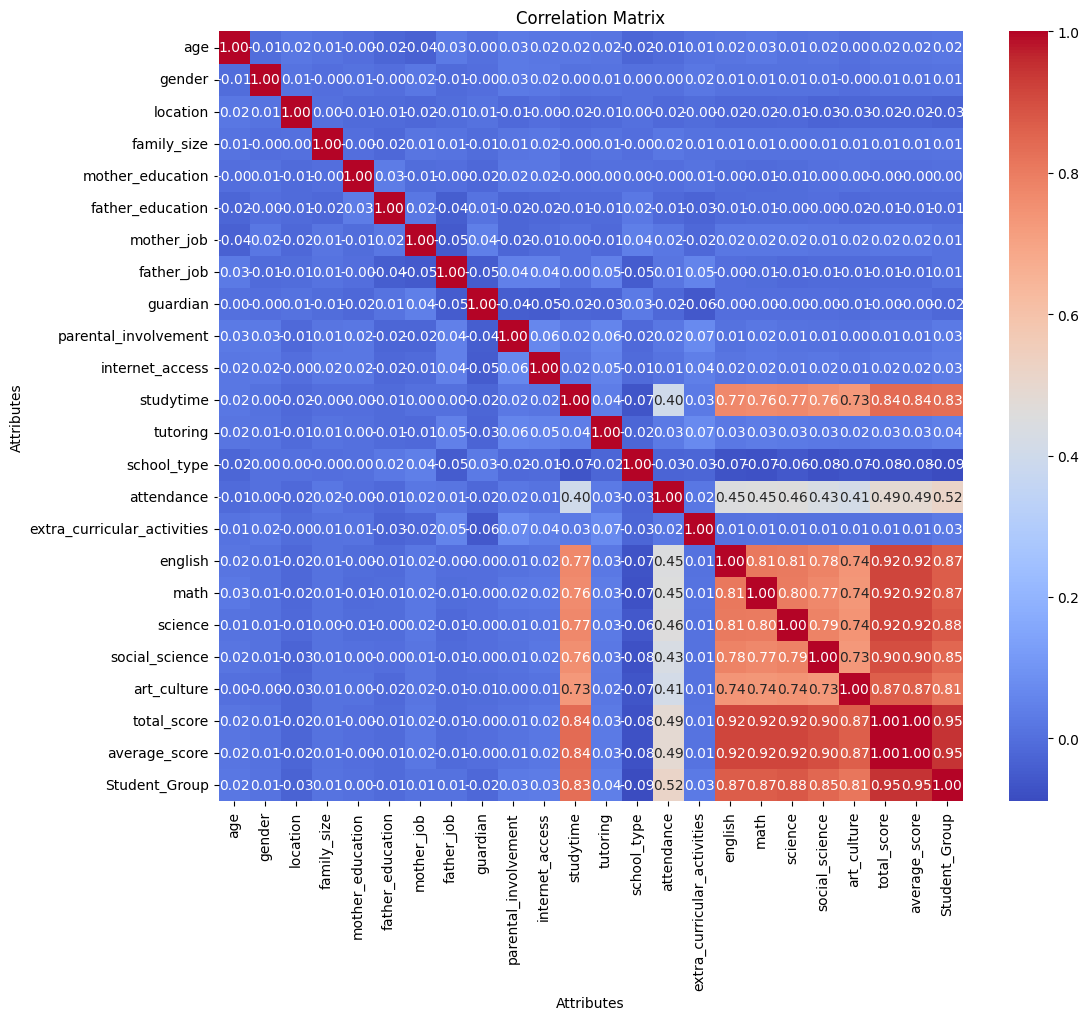

In [13]:
Attributes = data[[
    'age', 'gender', 'location', 'family_size', 'mother_education',
       'father_education', 'mother_job', 'father_job', 'guardian',
       'parental_involvement', 'internet_access', 'studytime', 'tutoring',
       'school_type', 'attendance', 'extra_curricular_activities', 'english',
       'math', 'science', 'social_science', 'art_culture', 'total_score',
       'average_score','stu_group'
]].copy()

# Convert non-numeric columns to numeric using label encoding
label_encoder = LabelEncoder()
for column in Attributes.columns:
    if Attributes[column].dtype == 'object':
        Attributes[column] = label_encoder.fit_transform(Attributes[column])

# Rename columns if specific names are provided (no ambiguous column renaming)
Attributes.rename(columns={
    "stu_group": "Student_Group"  # Example of renaming if needed
}, inplace=True)

# Calculate the correlation matrix
correlation_matrix = Attributes.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the axis labels and title
plt.xlabel('Attributes')
plt.ylabel('Attributes')
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()


> Gender Distribution of Students

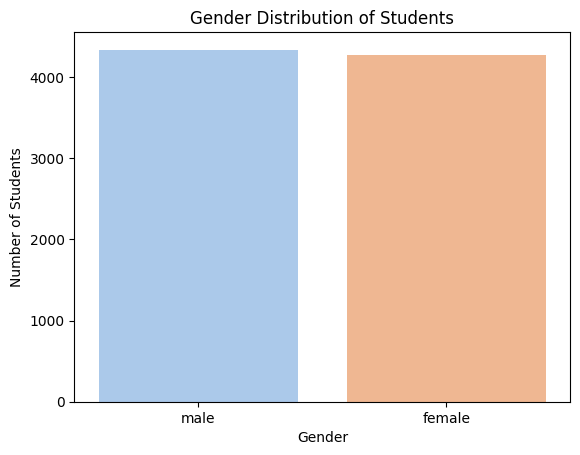

In [14]:
gender_count = data['gender'].value_counts()

# Plot gender distribution
sns.barplot(x=gender_count.index, y=gender_count.values, palette='pastel')
plt.title('Gender Distribution of Students')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()

> How is the age of students distributed

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


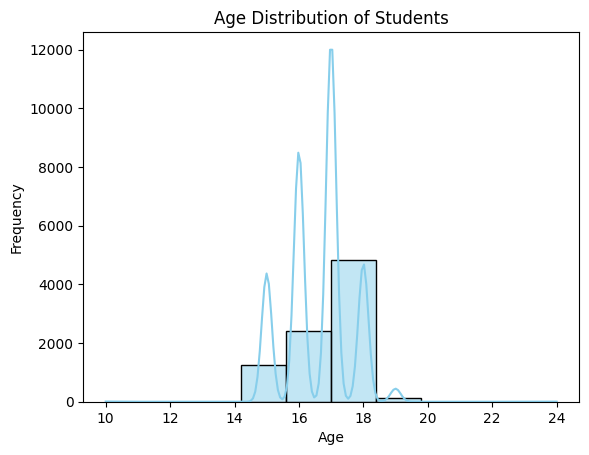

In [15]:
sns.histplot(data['age'], kde=True, bins=10, color='skyblue')
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

> Average Score in each Subject

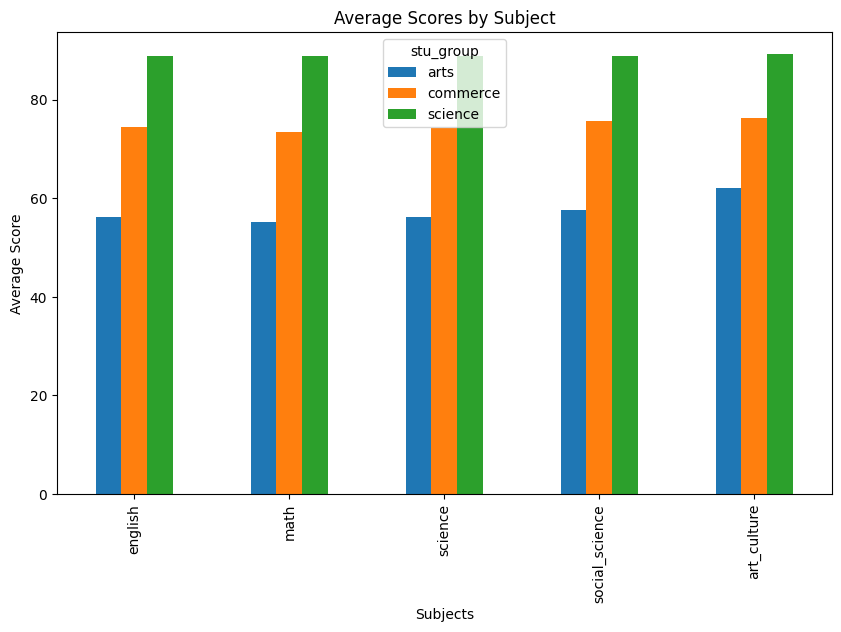

In [16]:
average_scores = data.groupby('stu_group')[['english', 'math', 'science', 'social_science', 'art_culture']].mean()

average_scores.T.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Subject')
plt.xlabel('Subjects')
plt.ylabel('Average Score')

plt.show()

> academic performance vary by student group (Science, Commerce, Arts)

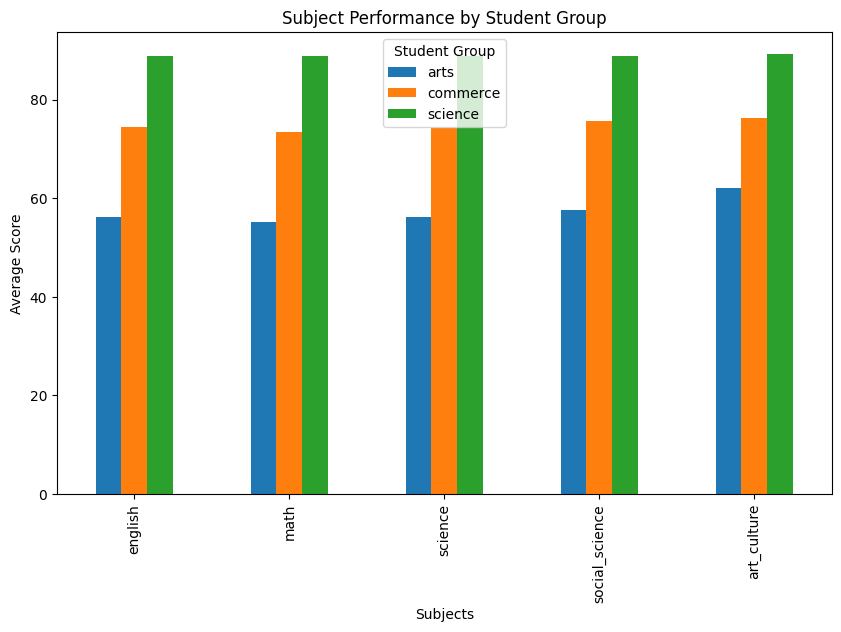

In [17]:
group_scores = data.groupby('stu_group')[['english', 'math', 'science', 'social_science', 'art_culture']].mean()

# Plot subject-wise averages
group_scores.T.plot(kind='bar', figsize=(10, 6))
plt.title('Subject Performance by Student Group')
plt.xlabel('Subjects')
plt.ylabel('Average Score')
plt.legend(title='Student Group')
plt.show()

> parental education level affect student performance

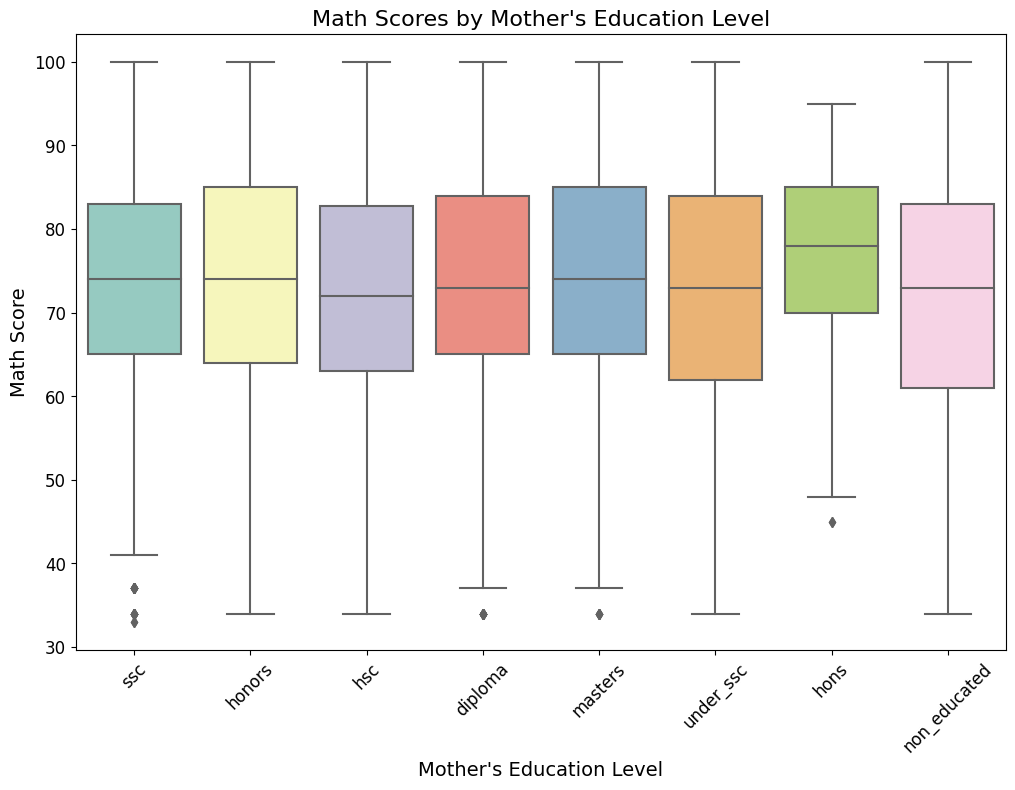

In [18]:
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(data=data, x='mother_education', y='math', palette='Set3')


plt.title('Math Scores by Mother\'s Education Level', fontsize=16)
plt.xlabel('Mother\'s Education Level', fontsize=14)
plt.ylabel('Math Score', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
# Show the plot
plt.show()

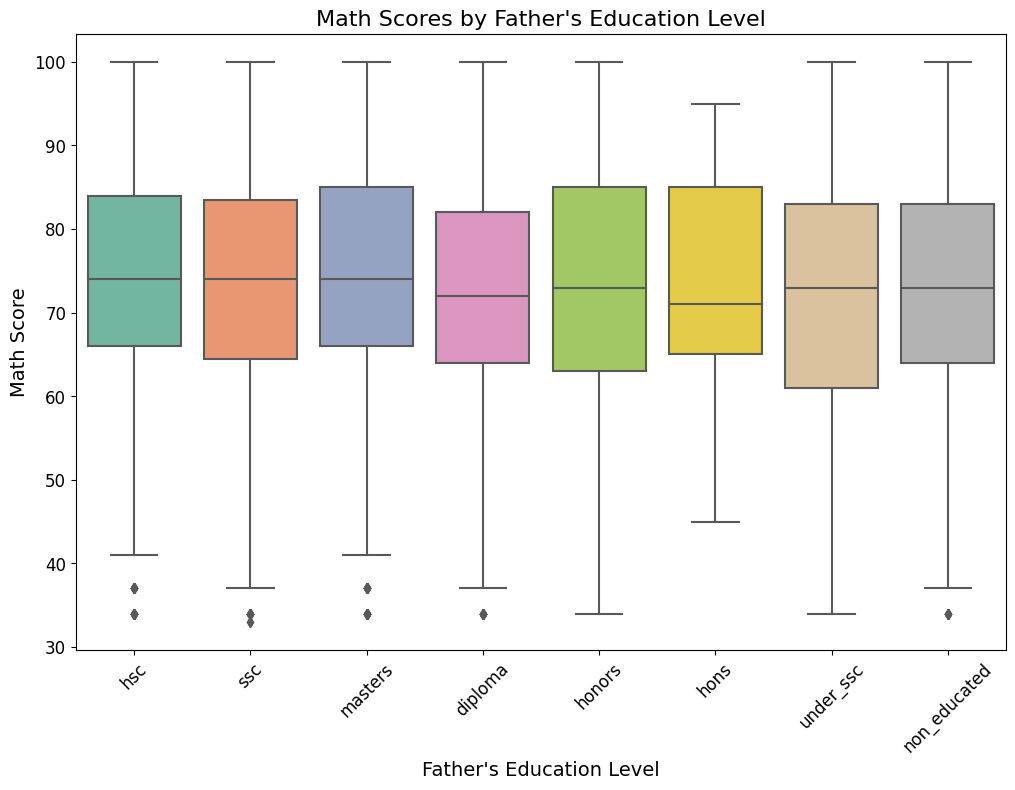

In [19]:
plt.figure(figsize=(12, 8)) 
sns.boxplot(data=data, x='father_education', y='math', palette='Set2')
plt.title('Math Scores by Father\'s Education Level', fontsize=16)
plt.xlabel('Father\'s Education Level', fontsize=14)
plt.ylabel('Math Score', fontsize=14)
plt.xticks(fontsize=12, rotation = 45)
plt.yticks(fontsize=12)
plt.show()

> extracurricular activity participation affect performance

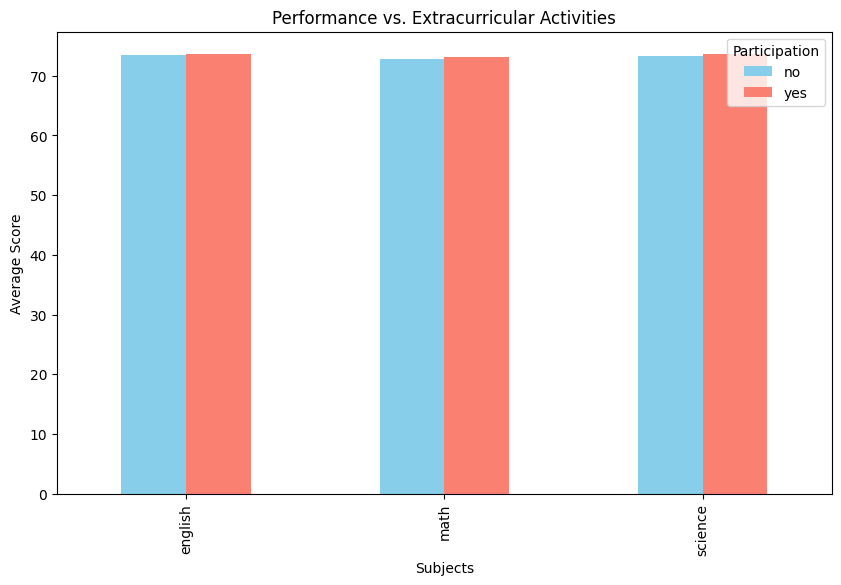

In [20]:
extracurricular_performance = data.groupby('extra_curricular_activities')[['english', 'math', 'science']].mean()

extracurricular_performance.T.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Performance vs. Extracurricular Activities')
plt.xlabel('Subjects')
plt.ylabel('Average Score')
plt.legend(title='Participation')
plt.show()

> attendance relate to performance

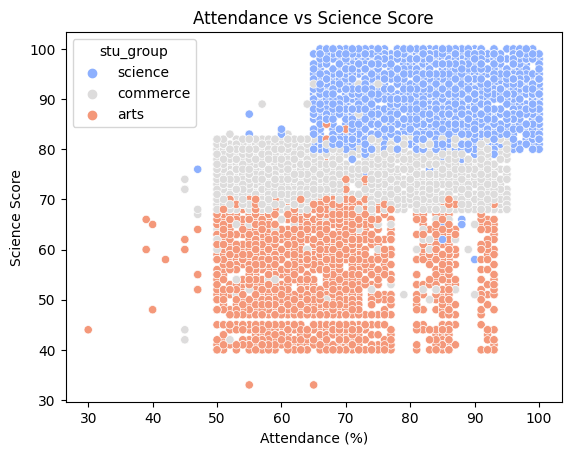

In [21]:
sns.scatterplot(data=data, x='attendance', y='science', hue='stu_group', palette='coolwarm')
plt.title('Attendance vs Science Score')
plt.xlabel('Attendance (%)')
plt.ylabel('Science Score')
plt.show()

> Internet access affect academic performance

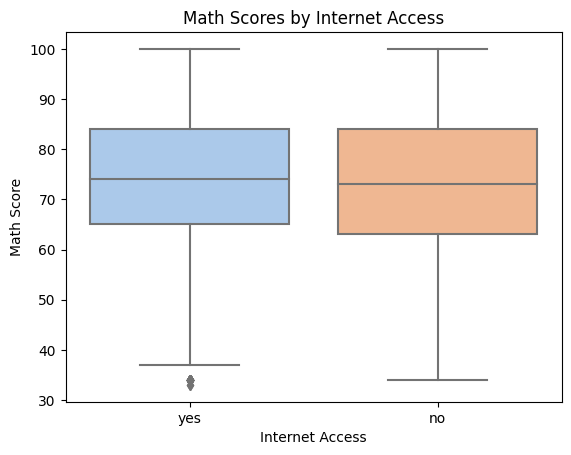

In [22]:
sns.boxplot(data=data, x='internet_access', y='math', palette='pastel')
plt.title('Math Scores by Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Math Score')
plt.show()


> student group shows the most consistent performance

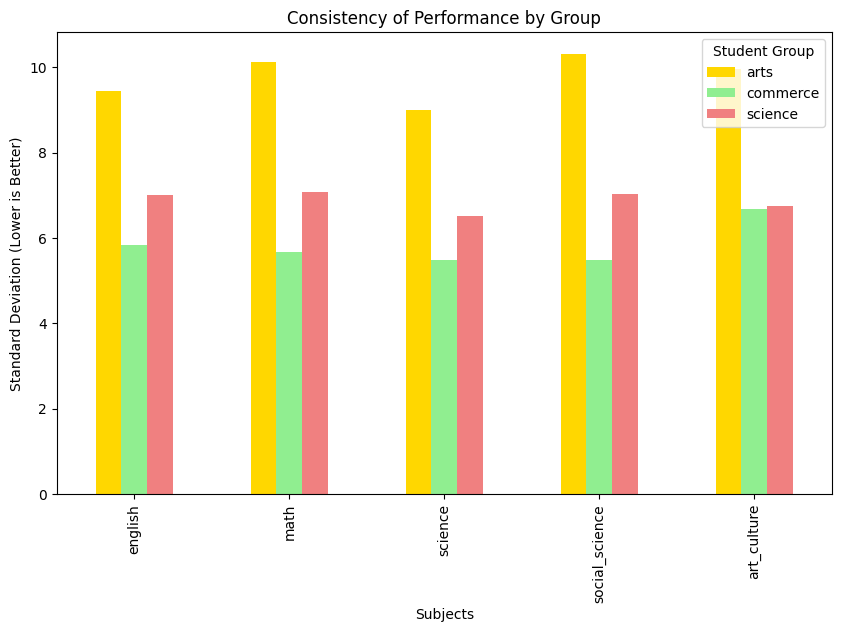

In [23]:
# Calculate standard deviation of scores for each group
group_std = data.groupby('stu_group')[['english', 'math', 'science', 'social_science', 'art_culture']].std()

group_std.T.plot(kind='bar', figsize=(10, 6), color=['gold', 'lightgreen', 'lightcoral'])
plt.title('Consistency of Performance by Group')
plt.xlabel('Subjects')
plt.ylabel('Standard Deviation (Lower is Better)')
plt.legend(title='Student Group')
plt.show()


> Gender ration in the dataset

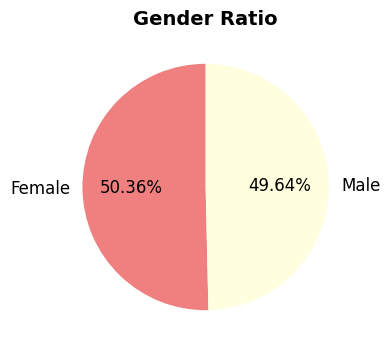

gender
male      4337
female    4275
Name: count, dtype: int64


In [24]:
size = data['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['lightcoral', 'lightyellow']  

plt.figure(figsize=(6, 4)) 
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Gender Ratio', fontweight='bold', fontsize=14)
plt.show()
print(size)

> Group ration in the dataset

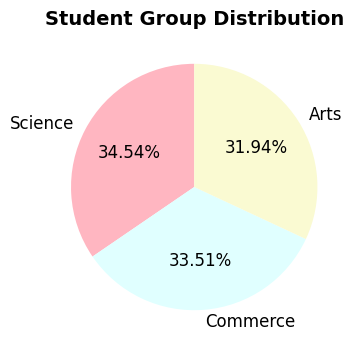

stu_group
science     2975
commerce    2886
arts        2751
Name: count, dtype: int64


In [25]:
size = data['stu_group'].value_counts()
labels = ['Science', 'Commerce', 'Arts']
colors = ['lightpink', 'lightcyan', 'lightgoldenrodyellow']
plt.figure(figsize=(4, 4))
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Student Group Distribution', fontweight='bold', fontsize=14)
plt.show()

print(size)

> Score distributions

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

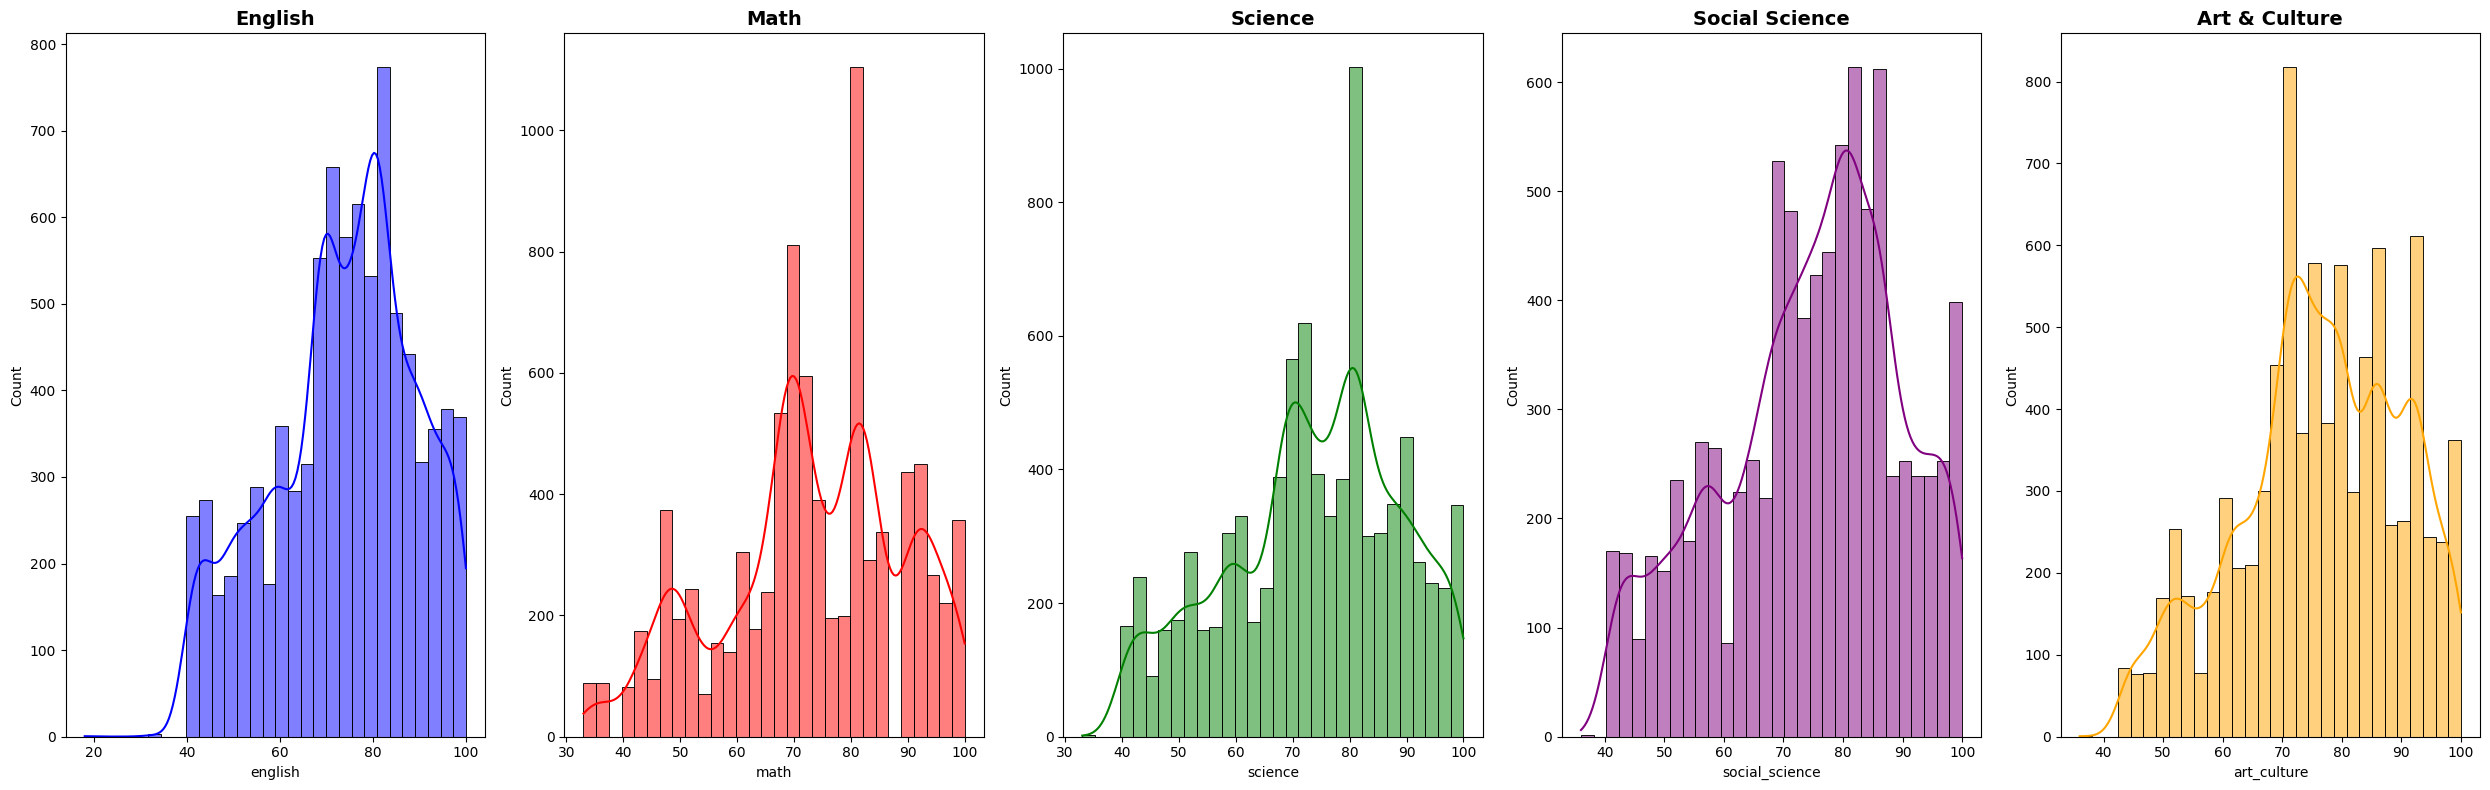

In [26]:
fig, ax = plt.subplots(1, 5, figsize=(25, 8))
fig.subplots_adjust(wspace=0.4)

# Plot score distributions
ax[0].set_title('English', fontweight='bold', fontsize=14)
sns.histplot(data=data, x='english', bins=30, kde=True, color='blue', ax=ax[0])

ax[1].set_title('Math', fontweight='bold', fontsize=14)
sns.histplot(data=data, x='math', bins=30, kde=True, color='red', ax=ax[1])

ax[2].set_title('Science', fontweight='bold', fontsize=14)
sns.histplot(data=data, x='science', bins=30, kde=True, color='green', ax=ax[2])

ax[3].set_title('Social Science', fontweight='bold', fontsize=14)
sns.histplot(data=data, x='social_science', bins=30, kde=True, color='purple', ax=ax[3])

ax[4].set_title('Art & Culture', fontweight='bold', fontsize=14)
sns.histplot(data=data, x='art_culture', bins=30, kde=True, color='orange', ax=ax[4])

plt.tight_layout()
plt.show()

> Sum the scores for each subject in the 'Science' group

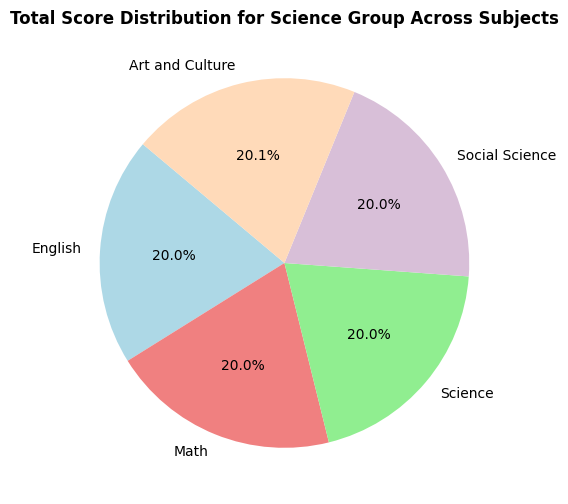

In [27]:
science_group = data[data['stu_group'] == 'science']


total_scores = {
    'English': science_group['english'].sum(),
    'Math': science_group['math'].sum(),
    'Science': science_group['science'].sum(),
    'Social Science': science_group['social_science'].sum(),
    'Art and Culture': science_group['art_culture'].sum()
}

labels = list(total_scores.keys())
sizes = list(total_scores.values())
colors = ['lightblue', 'lightcoral', 'lightgreen', 'thistle', 'peachpuff']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Total Score Distribution for Science Group Across Subjects', fontweight='bold')
plt.show()

> Sum the scores for each subject in the 'Commerce' group

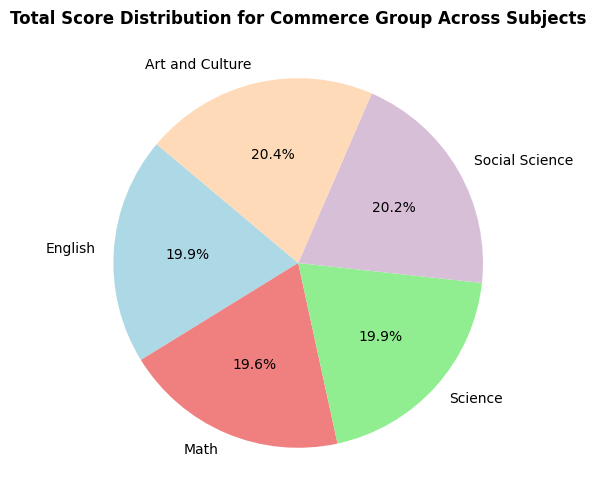

In [28]:
commerce_group = data[data['stu_group'] == 'commerce']

total_scores_commerce = {
    'English': commerce_group['english'].sum(),
    'Math': commerce_group['math'].sum(),
    'Science': commerce_group['science'].sum(),
    'Social Science': commerce_group['social_science'].sum(),
    'Art and Culture': commerce_group['art_culture'].sum()
}

labels_commerce = list(total_scores_commerce.keys())
sizes_commerce = list(total_scores_commerce.values())
colors = ['lightblue', 'lightcoral', 'lightgreen', 'thistle', 'peachpuff'] 

plt.figure(figsize=(6, 6))
plt.pie(sizes_commerce, labels=labels_commerce, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Total Score Distribution for Commerce Group Across Subjects', fontweight='bold')
plt.show()


> Sum the scores for each subject in the 'Arts' group

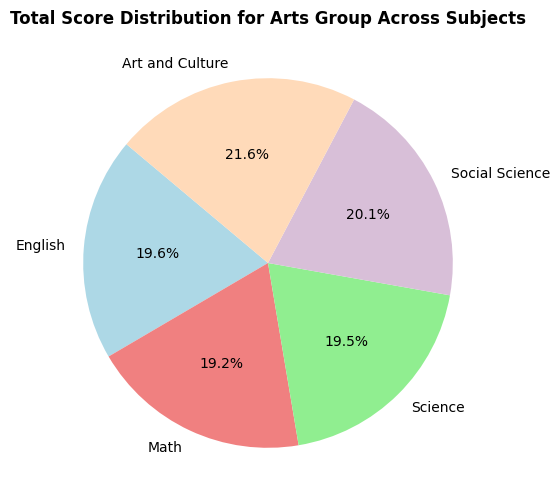

In [29]:
arts_group = data[data['stu_group'] == 'arts']

total_scores_arts = {
    'English': arts_group['english'].sum(),
    'Math': arts_group['math'].sum(),
    'Science': arts_group['science'].sum(),
    'Social Science': arts_group['social_science'].sum(),
    'Art and Culture': arts_group['art_culture'].sum()
}

labels_arts = list(total_scores_arts.keys())
sizes_arts = list(total_scores_arts.values())
colors = ['lightblue', 'lightcoral', 'lightgreen', 'thistle', 'peachpuff'] 

plt.figure(figsize=(6, 6))
plt.pie(sizes_arts, labels=labels_arts, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Total Score Distribution for Arts Group Across Subjects', fontweight='bold')
plt.show()

> Average studytime for each group

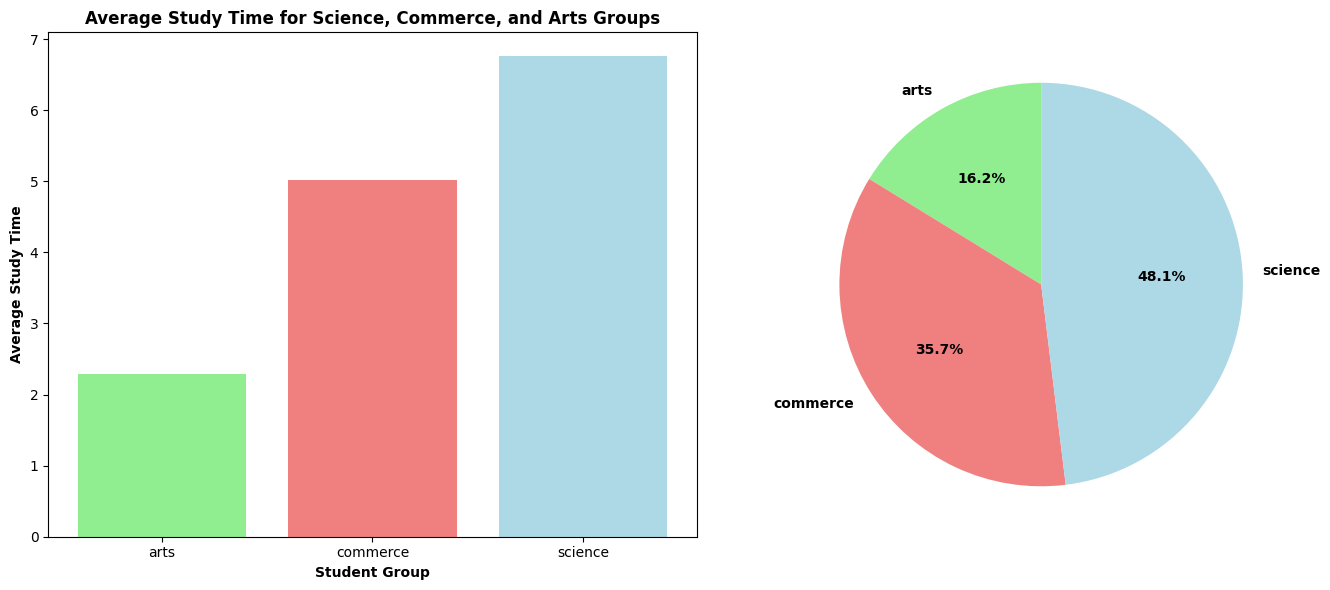

In [30]:
import matplotlib.pyplot as plt


science_group = data[data['stu_group'] == 'science']
commerce_group = data[data['stu_group'] == 'commerce']
arts_group = data[data['stu_group'] == 'arts']

average_studytime = data.groupby('stu_group')['studytime'].mean()

labels = average_studytime.index 
sizes = average_studytime.values  
colors = ['lightgreen', 'lightcoral', 'lightblue']  

fig, ax = plt.subplots(1, 2, figsize=(14, 6))  

ax[0].bar(average_studytime.index, average_studytime.values, color=['lightgreen', 'lightcoral', 'lightblue'])
ax[0].set_xlabel('Student Group', fontweight='bold')
ax[0].set_ylabel('Average Study Time', fontweight='bold')
ax[0].set_title('Average Study Time for Science, Commerce, and Arts Groups', fontweight='bold')

# Plot a pie chart in the second subplot for average studytime distribution
ax[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontweight': 'bold'})

plt.tight_layout()
plt.show()

> Distribution of Student Groups Across School Types

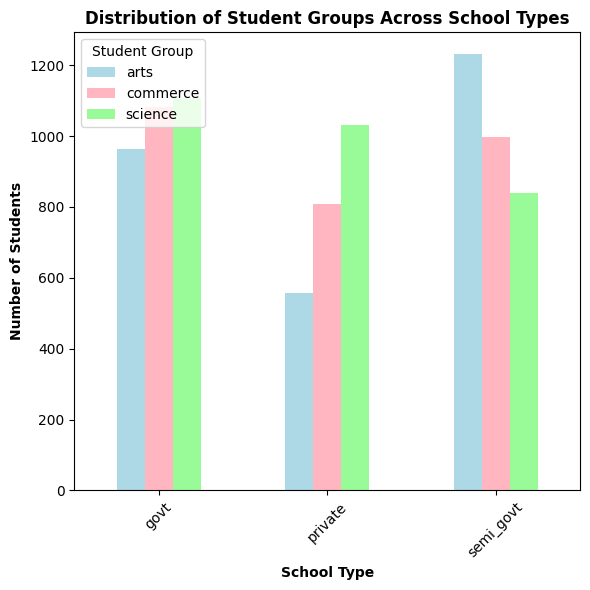

In [31]:
#     school_type=  ['Private', 'Govt', 'Semi_Govt']

# Aggregate data to get the count of each student group per school type
group_school_distribution = data.groupby(['school_type', 'stu_group']).size().unstack(fill_value=0)

light_colors = ['#ADD8E6', '#FFB6C1', '#98FB98']

group_school_distribution.plot(kind='bar', figsize=(6, 6), color=light_colors, stacked=False)

plt.xlabel('School Type', fontweight='bold')
plt.ylabel('Number of Students', fontweight='bold')
plt.title('Distribution of Student Groups Across School Types', fontweight='bold')
plt.legend(title='Student Group', loc='upper left') 
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

> Average Attendance for Science, Commerce, and Arts Groups

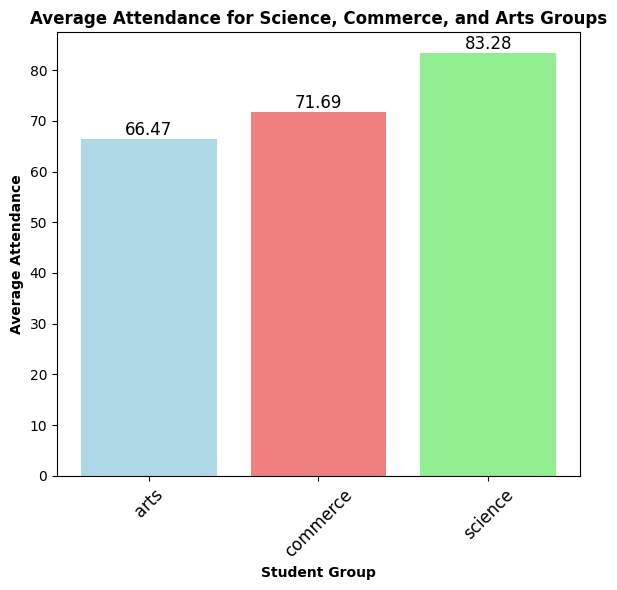

In [32]:
import matplotlib.pyplot as plt

average_attendance = data.groupby('stu_group')['attendance'].mean()

plt.figure(figsize=(6, 6))
bars = plt.bar(average_attendance.index, average_attendance.values, color=['lightblue', 'lightcoral', 'lightgreen'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2),
             ha='center', va='bottom', fontsize=12)

# Customize the plot
plt.xlabel('Student Group', fontweight='bold')
plt.ylabel('Average Attendance', fontweight='bold')
plt.title('Average Attendance for Science, Commerce, and Arts Groups', fontweight='bold')
plt.xticks(rotation=45, fontsize=12)  

plt.tight_layout()
plt.show()


<div style="background-color:#00008B; padding: 20px; border-radius: 255px; font-weight: bold; border: 3px solid #00008B; text-align: center;">
    <h1 style="font-size: 30px; color: white; margin: 0;">5 | Data Preproceesing</h1>
</div>


> Handle null value

In [33]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

data['mother_education'].fillna('Non_Educated', inplace=True)
data['father_education'].fillna('Non_Educated', inplace=True)

data['location'].fillna('Urban', inplace=True)
data.isnull().sum()

id                             0
full_name                      0
age                            0
gender                         0
location                       0
family_size                    0
mother_education               0
father_education               0
mother_job                     0
father_job                     0
guardian                       0
parental_involvement           0
internet_access                0
studytime                      0
tutoring                       0
school_type                    0
attendance                     0
extra_curricular_activities    0
english                        0
math                           0
science                        0
social_science                 0
art_culture                    0
stu_group                      0
total_score                    0
average_score                  0
dtype: int64

> Categorical data convert into numeric

In [34]:
categorical_cols = [
    "gender", "location", "mother_education", "father_education",
    "mother_job", "father_job", "guardian", "parental_involvement",
    "internet_access", "tutoring", "school_type","extra_curricular_activities", "stu_group"
]

le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [35]:
class_count = data["stu_group"].value_counts()

class_count

stu_group
2    2975
1    2886
0    2751
Name: count, dtype: int64

<div style="background-color:#00008B; padding: 20px; border-radius: 255px; font-weight: bold; border: 3px solid #00008B; text-align: center;">
    <h1 style="font-size: 30px; color: white; margin: 0;">6 | Data Spliting</h1>
</div>


In [36]:
X=data.drop(labels=['stu_group','full_name','id'], axis=1)
y=data['stu_group']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<div style="background-color:#00008B; padding: 20px; border-radius: 255px; font-weight: bold; border: 3px solid #00008B; text-align: center;">
    <h1 style="font-size: 30px; color: white; margin: 0;">7 | Machine Learning Model</h1>
</div>


# **Decision Tree Classifier**

In [38]:
# Train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Generate and print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Decision Tree Accuracy: 0.9675
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       798
           1       0.95      0.96      0.96       884
           2       0.98      0.97      0.97       902

    accuracy                           0.97      2584
   macro avg       0.97      0.97      0.97      2584
weighted avg       0.97      0.97      0.97      2584



In [39]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Creating a DataFrame for better readability
metrics = {
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Mean Absolute Error', 'Mean Squared Error'],
    'Score': [accuracy, f1, precision, recall, mae, mse]
}

# Create a pandas DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the results in tabular format
print("\nPerformance Metrics (Tabular Format):")
print(metrics_df)


Confusion Matrix:
 [[775  22   1]
 [ 15 849  20]
 [  3  23 876]]

Performance Metrics (Tabular Format):
                Metric     Score
0             Accuracy  0.967492
1             F1 Score  0.967529
2            Precision  0.967598
3               Recall  0.967492
4  Mean Absolute Error  0.034056
5   Mean Squared Error  0.037152


# **Random Forest Classifier**

In [40]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Fit the model on training data
rf.fit(X_train, y_train)

# Evaluate on test data
y_pred = rf.predict(X_test)

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.4f}")

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Random Forest Classifier Accuracy: 0.9799
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       798
           1       0.96      0.99      0.97       884
           2       0.99      0.97      0.98       902

    accuracy                           0.98      2584
   macro avg       0.98      0.98      0.98      2584
weighted avg       0.98      0.98      0.98      2584



In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Creating a DataFrame for better readability
metrics = {
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Mean Absolute Error', 'Mean Squared Error'],
    'Score': [accuracy, f1, precision, recall, mae, mse]
}

# Create a pandas DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the results in tabular format
print("\nPerformance Metrics (Tabular Format):")
print(metrics_df)

Confusion Matrix:
 [[785  12   1]
 [  9 871   4]
 [  3  23 876]]

Performance Metrics (Tabular Format):
                Metric     Score
0             Accuracy  0.979876
1             F1 Score  0.979917
2            Precision  0.980153
3               Recall  0.979876
4  Mean Absolute Error  0.021672
5   Mean Squared Error  0.024768


# **KNeighborsClassifier**

In [42]:
# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)


# Evaluate on test data
y_pred = knn.predict(X_test)

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"KNeighborsClassifier Accuracy: {accuracy:.4f}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

KNeighborsClassifier Accuracy: 0.9694
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       798
           1       0.95      0.97      0.96       884
           2       0.99      0.96      0.98       902

    accuracy                           0.97      2584
   macro avg       0.97      0.97      0.97      2584
weighted avg       0.97      0.97      0.97      2584



In [43]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Creating a DataFrame for better readability
metrics = {
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Mean Absolute Error', 'Mean Squared Error'],
    'Score': [accuracy, f1, precision, recall, mae, mse]
}

# Create a pandas DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the results in tabular format
print("\nPerformance Metrics (Tabular Format):")
print(metrics_df)

Confusion Matrix:
 [[778  19   1]
 [ 16 857  11]
 [  2  30 870]]

Performance Metrics (Tabular Format):
                Metric     Score
0             Accuracy  0.969427
1             F1 Score  0.969503
2            Precision  0.969765
3               Recall  0.969427
4  Mean Absolute Error  0.031734
5   Mean Squared Error  0.034056


# **SVM Classifier**

In [44]:
# Initialize the SVM classifier
svm_model = SVC(probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predicting
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Logistic Regression Accuracy: 0.9586
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       798
           1       0.93      0.96      0.94       884
           2       0.99      0.95      0.97       902

    accuracy                           0.96      2584
   macro avg       0.96      0.96      0.96      2584
weighted avg       0.96      0.96      0.96      2584



In [45]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Creating a DataFrame for better readability
metrics = {
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Mean Absolute Error', 'Mean Squared Error'],
    'Score': [accuracy, f1, precision, recall, mae, mse]
}

# Create a pandas DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the results in tabular format
print("\nPerformance Metrics (Tabular Format):")
print(metrics_df)


Confusion Matrix:
 [[775  22   1]
 [ 32 848   4]
 [  3  45 854]]

Performance Metrics (Tabular Format):
                Metric     Score
0             Accuracy  0.958591
1             F1 Score  0.958768
2            Precision  0.959574
3               Recall  0.958591
4  Mean Absolute Error  0.042957
5   Mean Squared Error  0.046053


# **XGBClassifier**

In [46]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)

# Evaluate on test data
y_pred = xgb_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoosting Accuracy: {accuracy:.4f}")

# Classification report (includes precision, recall, f1-score, and support)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

XGBoosting Accuracy: 0.9810
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       798
           1       0.96      0.99      0.97       884
           2       0.99      0.98      0.98       902

    accuracy                           0.98      2584
   macro avg       0.98      0.98      0.98      2584
weighted avg       0.98      0.98      0.98      2584



In [47]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Creating a DataFrame for better readability
metrics = {
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Mean Absolute Error', 'Mean Squared Error'],
    'Score': [accuracy, f1, precision, recall, mae, mse]
}

# Create a pandas DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the results in tabular format
print("\nPerformance Metrics (Tabular Format):")
print(metrics_df)


Confusion Matrix:
 [[782  15   1]
 [  7 873   4]
 [  2  20 880]]

Performance Metrics (Tabular Format):
                Metric     Score
0             Accuracy  0.981037
1             F1 Score  0.981085
2            Precision  0.981327
3               Recall  0.981037
4  Mean Absolute Error  0.020124
5   Mean Squared Error  0.022446


<div style="background-color:#00008B; padding: 20px; border-radius: 255px; font-weight: bold; border: 3px solid #00008B; text-align: center;">
    <h1 style="font-size: 30px; color: white; margin: 0;">8 | Smart Decision Making Model</h1>
</div>

In [48]:
# Create the Voting Classifier
final_model = VotingClassifier(
    estimators=[('dt', dt), ('rf', rf), ('Knn', knn),('svm_model', svm_model), ('xgb_model', xgb_model)],
    voting='soft',weights =[2,3,2,2,3]
)

# Train the model
final_model.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('Knn', KNeighborsClassifier()),
                             ('svm_model',
                              SVC(probability=True, random_state=42)),
                             ('xgb_model',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))],
                 voting='soft', weights=[2, 3, 2, 2, 3])

In [49]:
# Make predictions
pred_final = final_model.predict(X_test)  # Use pred_final instead of y_pred

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_final)
print(f"VotingClassifier Accuracy: {accuracy:.4f}")

# Classification report
report = classification_report(y_test, pred_final)
print("Classification Report:\n", report)

# Confusion Matrix
cm = confusion_matrix(y_test, pred_final)
print("Confusion Matrix:\n", cm)

# Performance metrics
f1 = f1_score(y_test, pred_final, average='weighted')  # Use 'weighted' for multiclass
precision = precision_score(y_test, pred_final, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, pred_final, average='weighted')  # Use 'weighted' for multiclass
mae = mean_absolute_error(y_test, pred_final)
mse = mean_squared_error(y_test, pred_final)

print(f"VotingClassifier F1 Score: {f1:.4f}")
print(f"VotingClassifier Precision Score: {precision:.4f}")
print(f"VotingClassifier Recall Score: {recall:.4f}")
print(f"VotingClassifier Mean Absolute Error: {mae:.4f}")
print(f"VotingClassifier Mean Squared Error: {mse:.4f}")

VotingClassifier Accuracy: 0.9826
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       798
           1       0.96      0.99      0.98       884
           2       1.00      0.97      0.99       902

    accuracy                           0.98      2584
   macro avg       0.98      0.98      0.98      2584
weighted avg       0.98      0.98      0.98      2584

Confusion Matrix:
 [[786  11   1]
 [  8 876   0]
 [  2  23 877]]
VotingClassifier F1 Score: 0.9826
VotingClassifier Precision Score: 0.9829
VotingClassifier Recall Score: 0.9826
VotingClassifier Mean Absolute Error: 0.0186
VotingClassifier Mean Squared Error: 0.0209


<div style="background-color:#00008B; padding: 20px; border-radius: 255px; font-weight: bold; border: 3px solid #00008B; text-align: center;">
    <h1 style="font-size: 30px; color: white; margin: 0;">9 | Recommendation System</h1>
</div>

In [50]:
# New data (ensure it matches expected number of elements, adjust accordingly)
newdata = [
    17, 1, 2, 4, 3, 4, 1, 1, 1, 2, 1, 8, 1, 3, 90, 1, 90, 85, 70, 88, 80, 428, 85.6
]

# Group mapping (for readability)
group_mapping = {2: "Science", 1: "Commerce", 0: "Arts"}

def recommend(data):
    import pandas as pd  # Ensure pandas is imported

    # Create DataFrame from the input list
    pre_data = pd.DataFrame({
        'age': [data[0]],
        'gender': [data[1]],
        'location': [data[2]],
        'family_size': [data[3]],
        'mother_education': [data[4]],
        'father_education': [data[5]],
        'mother_job': [data[6]],
        'father_job': [data[7]],
        'guardian': [data[8]],
        'parental_involvement': [data[9]],
        'internet_access': [data[10]],
        'studytime': [data[11]],
        'tutoring': [data[12]],
        'school_type': [data[13]],
        'attendance': [data[14]],
        'extra_curricular_activities': [data[15]],
        'english': [data[16]],
        'math': [data[17]],
        'science': [data[18]],
        'social_science': [data[19]],
        'art_culture': [data[20]],
        'total_score': [data[21]],
        'average_score': [data[22]],
    })

    # Predict probabilities
    probabilities = final_model.predict_proba(pre_data)[0]

    # Find the group with the highest probability
    predicted_group_index = probabilities.argmax()
    predicted_group_label = group_mapping[predicted_group_index]

    # Create a dictionary with the groups and their respective probabilities
    probability_dict = {
        group_mapping[key]: round(probabilities[key] * 100, 2) for key in group_mapping
    }

    # Sort the dictionary by probability in descending order
    sorted_probabilities = {k: v for k, v in sorted(probability_dict.items(), key=lambda item: item[1], reverse=True)}

    return predicted_group_label, sorted_probabilities

# Call the function
predicted_label, probabilities = recommend(newdata)

# Display results
print("Predicted Group:", predicted_label)
print("Prediction Probabilities:")
for group, probability in probabilities.items():
    print(f"{group}: {probability}%")


Predicted Group: Science
Prediction Probabilities:
Science: 78.38%
Commerce: 21.33%
Arts: 0.29%


In [51]:
# New data (ensure it matches expected number of elements, adjust accordingly)
newdata = [
    17, 1, 2, 4, 2, 2, 1, 1, 1, 2, 1, 4, 1, 2, 50, 1, 55, 50, 45, 60, 55, 250, 50.0
]


# Group mapping (for readability)
group_mapping = {2: "Science", 1: "Commerce", 0: "Arts"}

def recommend(data):
    import pandas as pd  # Ensure pandas is imported

    # Create DataFrame from the input list
    pre_data = pd.DataFrame({
        'age': [data[0]],
        'gender': [data[1]],
        'location': [data[2]],
        'family_size': [data[3]],
        'mother_education': [data[4]],
        'father_education': [data[5]],
        'mother_job': [data[6]],
        'father_job': [data[7]],
        'guardian': [data[8]],
        'parental_involvement': [data[9]],
        'internet_access': [data[10]],
        'studytime': [data[11]],
        'tutoring': [data[12]],
        'school_type': [data[13]],
        'attendance': [data[14]],
        'extra_curricular_activities': [data[15]],
        'english': [data[16]],
        'math': [data[17]],
        'science': [data[18]],
        'social_science': [data[19]],
        'art_culture': [data[20]],
        'total_score': [data[21]],
        'average_score': [data[22]],
    })

    # Predict probabilities
    probabilities = final_model.predict_proba(pre_data)[0]

    # Find the group with the highest probability
    predicted_group_index = probabilities.argmax()
    predicted_group_label = group_mapping[predicted_group_index]

    # Create a dictionary with the groups and their respective probabilities
    probability_dict = {
        group_mapping[key]: round(probabilities[key] * 100, 2) for key in group_mapping
    }

    # Sort the dictionary by probability in descending order
    sorted_probabilities = {k: v for k, v in sorted(probability_dict.items(), key=lambda item: item[1], reverse=True)}

    return predicted_group_label, sorted_probabilities

# Call the function
predicted_label, probabilities = recommend(newdata)

# Display results
print("Predicted Group:", predicted_label)
print("Prediction Probabilities:")
for group, probability in probabilities.items():
    print(f"{group}: {probability}%")


Predicted Group: Arts
Prediction Probabilities:
Arts: 99.0%
Commerce: 1.0%
Science: 0.0%


In [52]:
# New data (ensure it matches expected number of elements, adjust accordingly)
newdata = [
    17, 1, 2, 4, 3, 3, 1, 1, 1, 2, 1, 7, 1, 3, 80, 1, 85, 80, 75, 85, 80, 390, 78.0
]



# Group mapping (for readability)
group_mapping = {2: "Science", 1: "Commerce", 0: "Arts"}

def recommend(data):
    import pandas as pd  # Ensure pandas is imported

    # Create DataFrame from the input list
    pre_data = pd.DataFrame({
        'age': [data[0]],
        'gender': [data[1]],
        'location': [data[2]],
        'family_size': [data[3]],
        'mother_education': [data[4]],
        'father_education': [data[5]],
        'mother_job': [data[6]],
        'father_job': [data[7]],
        'guardian': [data[8]],
        'parental_involvement': [data[9]],
        'internet_access': [data[10]],
        'studytime': [data[11]],
        'tutoring': [data[12]],
        'school_type': [data[13]],
        'attendance': [data[14]],
        'extra_curricular_activities': [data[15]],
        'english': [data[16]],
        'math': [data[17]],
        'science': [data[18]],
        'social_science': [data[19]],
        'art_culture': [data[20]],
        'total_score': [data[21]],
        'average_score': [data[22]],
    })

    # Predict probabilities
    probabilities = final_model.predict_proba(pre_data)[0]

    # Find the group with the highest probability
    predicted_group_index = probabilities.argmax()
    predicted_group_label = group_mapping[predicted_group_index]

    # Create a dictionary with the groups and their respective probabilities
    probability_dict = {
        group_mapping[key]: round(probabilities[key] * 100, 2) for key in group_mapping
    }

    # Sort the dictionary by probability in descending order
    sorted_probabilities = {k: v for k, v in sorted(probability_dict.items(), key=lambda item: item[1], reverse=True)}

    return predicted_group_label, sorted_probabilities

# Call the function
predicted_label, probabilities = recommend(newdata)

# Display results
print("Predicted Group:", predicted_label)
print("Prediction Probabilities:")
for group, probability in probabilities.items():
    print(f"{group}: {probability}%")


Predicted Group: Commerce
Prediction Probabilities:
Commerce: 62.99%
Science: 35.1%
Arts: 1.92%


<div style="background-color:#00008B; padding: 20px; border-radius: 255px; font-weight: bold; border: 3px solid #00008B; text-align: center;">
    <h1 style="font-size: 30px; color: white; margin: 0;">10 | Comparison Between Models</h1>
</div>

In [53]:
# Train individual models and Voting Classifier
models = [dt, rf, knn, svm_model, xgb_model, final_model]
model_names = ['Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'SVM', 'XGBoost', 'Voting Classifier']

# Store results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for model, name in zip(models, model_names):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(results)

# Display the comparison table
print(comparison_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0        Decision Tree  0.967492   0.967598  0.967492  0.967529
1        Random Forest  0.979876   0.980153  0.979876  0.979917
2  K-Nearest Neighbors  0.969427   0.969765  0.969427  0.969503
3                  SVM  0.958591   0.959574  0.958591  0.958768
4              XGBoost  0.981037   0.981327  0.981037  0.981085
5    Voting Classifier  0.982585   0.982941  0.982585  0.982630


# Smart Decision Maker by Monitoring Progress of Student's Study

| Model               | Accuracy | Precision | Recall | F1-Score |
|---------------------|----------|-----------|--------|----------|
| Decision Tree       | 0.9674   | 0.9675    | 0.9674 | 0.9675   |
| Random Forest       | 0.9798   | 0.9810    | 0.9798 | 0.9799   |
| K-Nearest Neighbors | 0.9697   | 0.9697    | 0.9694 | 0.96031   |
| SVM                 | 0.9585   | 0.9595    | 0.9585 | 0.9587   |
| XGBoost             | 0.9810   | 0.9813    | 0.9810 | 0.9810   |
| Voting Classifier26 | 0.9826   | 0.9829    | 0.9826 | 0.9826   |

---

> **Smart Decision Maker by Monitoring Progress of Student's Study**


<div style="background-color:#FF6347; padding: 20px; border-radius: 255px; font-weight: bold; border: 3px solid #FF6347; text-align: center;">
    <h1 style="font-size: 30px; color: white; margin: 0;">You're welcome! Good luck with everything!</h1>
</di>
